In [31]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import optimize

In [32]:
T = 80

In [33]:
df = pd.read_csv('%dK_and_0degree.csv' %T)


In [34]:
df=df.drop(labels =['Unnamed: 0'],axis = 1)

In [35]:
#sample geometry
t=70*pow(10,-9)
w=5
L=40

In [36]:
df.columns

Index(['Temperature', 'Position', 'Magnetic field (Oe)', 'Rxx', 'Rxy'], dtype='object')

In [37]:
x=np.array(df['Magnetic field (Oe)'])
y=np.array(df['Rxx'])

In [38]:
#df_xx

### extract $\sigma$_xx

In [39]:
df_xx = df[['Magnetic field (Oe)','Rxx']]
df_xx = df_xx.dropna(axis=0, how='any', inplace=False)
#df_xx.iloc[1]['Magnetic field (Oe)']

In [40]:
#shift data to make it cross (0,0)
l=[]
l2=[]
a=1
thr=2500
while a<len(df_xx):
    if abs(df_xx.iloc[a]['Magnetic field (Oe)']-0)<thr:
        l.append(df_xx.iloc[a]['Rxx']) 
        l2.append(df_xx.iloc[a]['Magnetic field (Oe)'])
    a+=1
global mean
mean=sum(l)/len(l)
print(l)
print(l2)
print(mean)
Rxx=mean
Rxx

[30.8590894900246, 30.8616114921529]
[-86.654, 224.148]
30.860350491088752


30.860350491088752

In [41]:
rhoxx=Rxx*(10/20)*70*10**-3
sigmaxx=np.reciprocal(rhoxx)
print(sigmaxx,rhoxx)

0.9258296849116756 1.0801122671881063


In [42]:
df

,Temperature,Position,Magnetic field (Oe),Rxx,Rxy
0,79.99920,0.0,69259.4960,NaN,0.247490
1,80.00155,0.0,67772.2030,30.740809,NaN
2,79.99995,0.0,66414.6525,NaN,0.255963
3,80.00170,0.0,64918.2870,30.750704,NaN
4,80.00145,0.0,63422.4865,NaN,0.264794
...,...,...,...,...,...
183,79.99990,0.0,66953.8515,30.789012,NaN
184,80.00030,0.0,68541.8830,NaN,0.250366
185,80.00055,0.0,69853.6015,30.782943,NaN
186,80.00045,0.0,69998.9380,NaN,0.245661


### Data rearrange

In [43]:
df['Magnetic field (T)']=df['Magnetic field (Oe)']/10000
df['rho_xy (Ohm-m)']=df['Rxy']*(w/L)*t
df['rho_xy (uOhm-m)']=df['rho_xy (Ohm-m)']*10**6
df['sigma_xy (1/uOhm-m)']=(-1+(1-4*sigmaxx**2*df['rho_xy (uOhm-m)']**2)**0.5)/(2*df['rho_xy (uOhm-m)'])
df_xy = df[['Magnetic field (T)','rho_xy (uOhm-m)','sigma_xy (1/uOhm-m)']]
df_xy = df_xy.dropna(axis=0, how='any', inplace=False) 

In [44]:
sigmaxx

0.9258296849116756

In [45]:
df_xy

,Magnetic field (T),rho_xy (uOhm-m),sigma_xy (1/uOhm-m)
0,6.925950,0.002166,-0.001856
2,6.641465,0.002240,-0.001920
4,6.342249,0.002317,-0.001986
6,6.039592,0.002397,-0.002055
8,5.737834,0.002475,-0.002122
...,...,...,...
178,5.954460,0.002424,-0.002078
180,6.261756,0.002344,-0.002009
182,6.560396,0.002267,-0.001943
184,6.854188,0.002191,-0.001878


In [46]:
df_xy.columns

Index(['Magnetic field (T)', 'rho_xy (uOhm-m)', 'sigma_xy (1/uOhm-m)'], dtype='object')

Text(0, 0.5, '$\\sigma$ _xy (1/uOhm-m)')

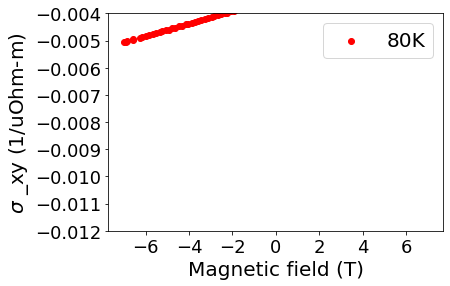

In [47]:
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['sigma_xy (1/uOhm-m)'])
plt.scatter(x, y, label='%dK'%T,color='red' )
plt.legend(loc='best',fontsize=20)
plt.ylim(-0.012, -0.004)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\sigma$ _xy (1/uOhm-m)',fontsize=20)


In [48]:
#df['Magnetic field (T)']=df['Magnetic field (Oe)']/10000
#df['rho_xy (Ohm-m)']=df['Rxy']*(w/L)*t
#df['rho_xy (uOhm-m)']=df['rho_xy (Ohm-m)']*10**6
#df['sigma_xy (1/uOhm-m)']=np.reciprocal(df['rho_xy (uOhm-m)'])
df_xy = df[['Magnetic field (T)','rho_xy (uOhm-m)','sigma_xy (1/uOhm-m)']]
df_xy = df_xy.dropna(axis=0, how='any', inplace=False)      

(0, 0.005)

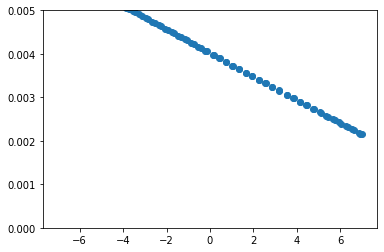

In [49]:
x1=np.array(df_xy['Magnetic field (T)'])
y1=np.array(df_xy['rho_xy (uOhm-m)'])

plt.scatter(x1,y1)
plt.ylim(0,0.005)

### $\sigma$ fitting
unit of n: 10^26/m^3, unit of e: m^2/Vs

Text(0, 0.5, '$\\sigma$ _xy (1/uOhm-m)')

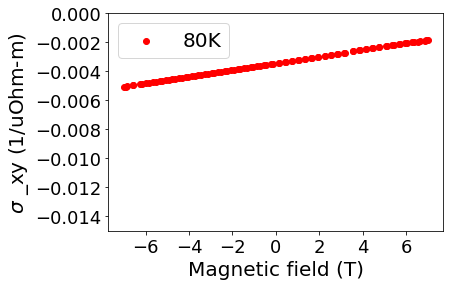

In [50]:
#positive_part = (df_xy['Magnetic field (T)']-0)>0
#bad_data = (df_xy['Magnetic field (T)']-6)<0
#df_xy=df_xy[positive_part&bad_data]
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['sigma_xy (1/uOhm-m)'])
plt.scatter(x, y, label='%dK'%T,color='red' )
plt.legend(loc='best',fontsize=20)
plt.ylim(-0.015, 0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\sigma$ _xy (1/uOhm-m)',fontsize=20)

In [51]:
#shift data to make it cross (0,0)
l=[]
l2=[]
a=1
thr=0.24
while a<len(df_xy):
    if abs(df_xy.iloc[a]['Magnetic field (T)']-0)<thr:
        l.append(df_xy.iloc[a]['sigma_xy (1/uOhm-m)']) 
        l2.append(df_xy.iloc[a]['Magnetic field (T)'])
    a+=1
global mean
mean=sum(l)/len(l)
df_xy['sigma_xy (1/uOhm-m)']=(df_xy['sigma_xy (1/uOhm-m)']-mean)
l2

[0.14198229999999998, -0.21931894999999998, -0.1320223, 0.1630836]

Text(0, 0.5, '$\\sigma$$_{xy}$ (1/$\\mu$$Ω$-m)')

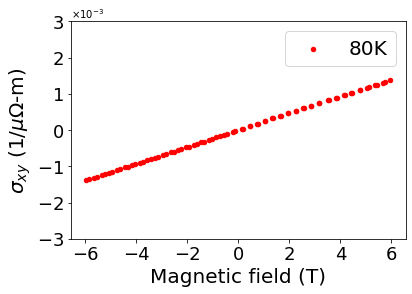

In [52]:
#positive_part = (df_xy['Magnetic field (T)']-0)>0
bad_data_1 = abs(df_xy['Magnetic field (T)'])<6
#bad_data_2 = (df_xy['Magnetic field (T)']+6)<0
df_xy=df_xy[bad_data_1]
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['sigma_xy (1/uOhm-m)'])
plt.scatter(x, y, label= '%dK'%T,color='red',s=20)
plt.legend(loc='best',fontsize=20)
#plt.ylim(0, 0.5*10**-8)
plt.ylim(-0.003, 0.003)
#plt.grid(axis = 'both')
plt.ticklabel_format(style='sci', axis='y', scilimits=(-3,-3), useMathText=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\sigma$$_{xy}$ (1/$\mu$$\u03A9$-m)',fontsize=20)

### 1 channel fitting

In [70]:
#One channel fitting
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['sigma_xy (1/uOhm-m)'])
def test_func(H, n, u):
    #return  -16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    return 16*H*(n*u**2/(1+(u*H)**2))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
#popt, pcov = optimize.curve_fit(test_func, x, y,p0=[1,0],bounds=((1,0),(10,1000)),maxfev=50000000000)
popt1, pcov1 = optimize.curve_fit(test_func, x, y,maxfev=10000)
perr1=np.sqrt(np.diag(pcov1))
#calculate r_square
residuals = y- test_func(x, *popt1)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt1)
print(perr1)
print(r_squared)

[0.03067261 0.02185863]
[0.003741   0.00134682]
0.9999765360433317


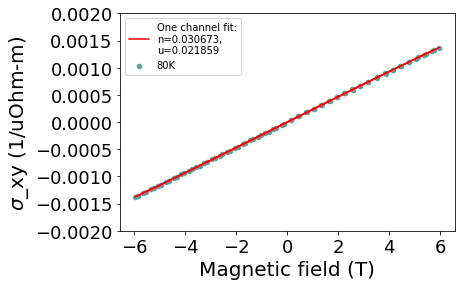

In [76]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=20)
plt.plot(x, test_func(x, *popt1), 'r-', label='One channel fit:\nn=%f,\nu=%f' % tuple(popt1), )
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.ylim(-0.002, 0.002)
#plt.xlim(-1, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\sigma$_xy (1/uOhm-m)',fontsize=20)
plt.show()

### 2 channel fitting

In [55]:
#two channel fitting
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['sigma_xy (1/uOhm-m)'])
def test_func(H, ne, ue, nh, uh):
    return  -16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #return 16*H*(n*u**2/(1+(u*H)**2))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
popt2, pcov2 = optimize.curve_fit(test_func, x, y,p0=[1,0,1,0],bounds=((0,0,0,0),(100,100,100,100)),maxfev=50000000000)
#popt2, pcov2 = optimize.curve_fit(test_func, x, y,maxfev=5000000)
perr2=np.sqrt(np.diag(pcov2))
#calculate r_square
residuals = y- test_func(x, *popt2)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt2)
print(perr2)
print(ss_res)

[0.85623835 0.02143486 0.88686711 0.02145018]
[3658.61482677    4.34972938 3658.56002965    4.18827417]
1.208217675300585e-09


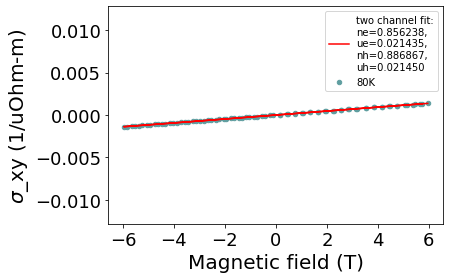

In [56]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=20)
#plt.plot(x, test_func(x, params[0], params[1]),label='Fitted function',color='coral',linewidth = 1)
plt.plot(x, test_func(x, *popt2), 'r-', label='two channel fit:\nne=%f,\nue=%f,\nnh=%f,\nuh=%f' % tuple(popt2))
plt.legend(loc='best')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.autoscale(enable=True, axis='y') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('$\sigma$_xy (1/uOhm-m)',fontsize=20)
plt.xlabel('Magnetic field (T)',fontsize=20)
#plt.ylim(-0.00075, 0.00075)
#plt.xlim(-2, 2)
plt.show()

In [57]:
print (popt1[0])
print (popt1[1])

0.03067261188522212
0.02185862766782296


In [58]:
index = [2,4,6,8,10,20,40,60,80,100,150,200,250,300]
params_1carrier = pd.DataFrame({'n': [4.78109302e+02,5.27764954e+02,5.66457868e+02,635.7549482246966,690.0973014494039,1022.3730850522339,13.512228184618829,0.040806687547994686,0.03067261188522212,0.023678277116165703,0.02220481938166531,0.013731124566033188,0.019132497078555608,0.05564192],
                                'u': [2.13295849e-04,2.02583257e-04,1.92746156e-04,0.00017918725543227335,0.00016980522147852351,0.00013472268166258894,0.0011438603306731154,0.020071906524893622,0.02185862766782296,0.023366727454003595,0.02096152372161219,0.02408054881541378,0.018779990442297525,0.01014688],},
                  index=index)


In [59]:
params_1carrier
params_1carrier.to_csv('1carrier_fitting.csv')

In [60]:
print (popt2[0])
print (popt2[1])
print (popt2[2])
print (popt2[3])


0.8562383527140945
0.021434858709268954
0.886867114504345
0.021450183895516235


In [61]:
index = [2,4,6,8,10,20,40,60,80,100,150,200,250,300]
params_2carrier = pd.DataFrame({'ne': [2.03712074,1.35085077,0.8278393853638397,0.9128517352964793,0.9697894216433034,1.1102957613581301,2.1644230508292877,0.714217990234362,0.9952647947047198,0.9323031893026593,1.4479296462900029,1.1103645131626187,2.2677306270041493,-0.3615511247358801],
           
                                'ue': [0.15388858,0.14394844 ,0.14525460612807758,0.14050428511940574,0.13334082946645057,0.10088548589347128,0.05568718097153488,0.020316726189016053,0.021865396311275462,0.023431767760528507,0.020974608527600348,0.060928776310979336,0.0520310713147547,0.04359636231642917],
                        
                                'nh': [2.04018646,1.3543182,0.8311181900351382,0.9161802578494711,0.9732885437675141,1.115189867257875,2.176548415644921,0.7550015099606332,1.0259373255701847,0.9559805721138082,1.470134305556993,1.1145357206674653,2.272588346979787,-0.3555098523233755],
                               
                                'uh': [0.15379579,0.14380191,0.14502845037790738,0.14030640866854732,0.1331595105626293,0.10073925734802075,0.055604715102857964,0.020303881473616857,0.021865194716964322,0.023430169956945752,0.020974412068448,0.06087320570019428,0.052003943899813936,0.04378175331532219],
                                
                               },index=index)

In [62]:
params_2carrier
params_2carrier.to_csv('2carrier_fitting.csv')

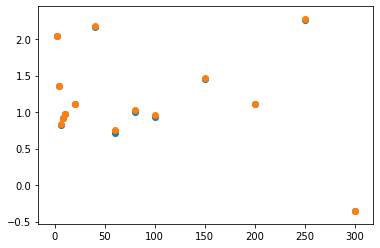

In [63]:
x=np.array(index)
y1=np.array(params_2carrier['ne'])
y2=np.array(params_2carrier['nh'])
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.show()

###  $\rho$ fitting (another model)
unit of n: 10^26/m^3, unit of e: m^2/Vs

Text(0, 0.5, '$ρ$_xy (uOhm-m)')

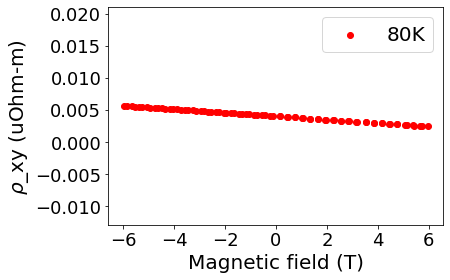

In [64]:
#positive_part = (df_xy['Magnetic field (T)']-0)>0
#bad_data = (df_xy['Magnetic field (T)']-6)<0
#df_xy=df_xy[positive_part&bad_data]
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['rho_xy (uOhm-m)'])
plt.scatter(x, y, label='%dK'%T,color='red' )
plt.legend(loc='best',fontsize=20)
#plt.ylim(-0.005, 0.005)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u03C1$_xy (uOhm-m)',fontsize=20)

In [65]:
#shift data to make it cross (0,0)
l=[]
l2=[]
a=1
thr=0.24
while a<len(df_xy):
    if abs(df_xy.iloc[a]['Magnetic field (T)']-0)<thr:
        l.append(df_xy.iloc[a]['rho_xy (uOhm-m)']) 
        l2.append(df_xy.iloc[a]['Magnetic field (T)'])
    a+=1
global mean
mean=sum(l)/len(l)
df_xy['rho_xy (uOhm-m)']=(df_xy['rho_xy (uOhm-m)']-mean)
l2

[0.14198229999999998, -0.21931894999999998, -0.1320223, 0.1630836]

Text(0, 0.5, '$ρ$_xy (uOhm-m)')

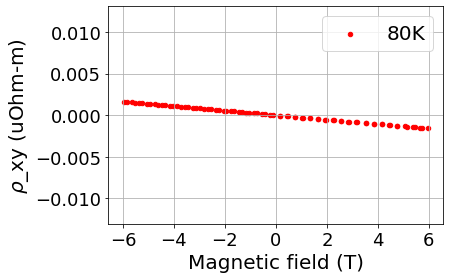

In [66]:
#positive_part = (df_xy['Magnetic field (T)']-0)>0
bad_data_1 = abs(df_xy['Magnetic field (T)'])<6
#bad_data_2 = (df_xy['Magnetic field (T)']+6)<0
df_xy=df_xy[bad_data_1]
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['rho_xy (uOhm-m)'])
plt.scatter(x, y, label= '%dK'%T,color='red',s=20)
plt.legend(loc='best',fontsize=20)
#plt.ylim(-0.0005, 0.0005)
plt.grid(axis = 'both')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u03C1$_xy (uOhm-m)',fontsize=20)

In [67]:
#two channel fitting
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['rho_xy (uOhm-m)'])
def test_func1(x, ne, ue, nh, uh):
    return  (x*(nh*uh**2-ne*ue**2)+(ue**2*uh**2*(nh-ne)*x**3))/(16*((ne*ue+nh*uh)**2+(nh-ne)**2*ue**2*uh**2*x**2))
    #return 16*H*(n*u**2/(1+(u*H)**2))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
popt, pcov = optimize.curve_fit(test_func, x, y,p0=[1000,0,1000,0],bounds=((0,0,0,0),(10000,1000,10000,1000)),maxfev=50000000000)
#popt, pcov = optimize.curve_fit(test_func1, x, y,maxfev=5000000)
#perr=np.sqrt(np.diag(pcov2))
#calculate r_square
residuals = y- test_func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt)
print(ss_res)

[1.00000001e+03 1.74733256e-04 1.00000000e+03 1.16374229e-04]
4.210925681164249e-09


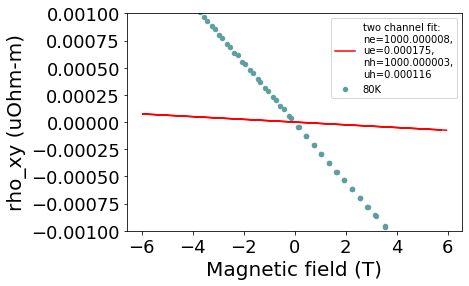

In [68]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=20)
#plt.plot(x, test_func(x, params[0], params[1]),label='Fitted function',color='coral',linewidth = 1)
plt.plot(x, test_func1(x, *popt), 'r-', label='two channel fit:\nne=%f,\nue=%f,\nnh=%f,\nuh=%f' % tuple(popt))
plt.legend(loc='best')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.autoscale(enable=True, axis='y') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('rho_xy (uOhm-m)',fontsize=20)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylim(-0.001, 0.001)
#plt.xlim(-2, 2)
plt.show()

### 1 channel fitting

x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['rho_xy (uOhm-m)'])
def test_func(H, n, u):
    #return  -16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #return 16*H*(n*u**2/(1+(u*H)**2))
    return (1+(u*H)**2)/(n*u**2*-16*H)
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
popt, pcov = optimize.curve_fit(test_func, x, y,p0=[1,0],bounds=((1,0),(1000,100)),maxfev=50000000000)
#popt, pcov = optimize.curve_fit(test_func, x, y,maxfev=10000)
perr=np.sqrt(np.diag(pcov))
#calculate r_square
residuals = y- test_func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt)
print(perr)
print(r_squared)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=20)
plt.plot(x, test_func(x, *popt), 'r-', label='One channel fit:\nn=%f,\nu=%f' % tuple(popt))
#plt.plot(x, test_func(x, *popt), 'r-', label='fit:\nn=%f,\nu=%f' % tuple(popt))
plt.legend(loc='best')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.autoscale(enable=True, axis='y') 
plt.grid(axis='both')
#plt.ylim(-0.001, 0.001)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\u03C1$_xy (1/uOhm-m)',fontsize=20)
plt.show()

### 2 channel fitting

import warnings
warnings.filterwarnings('ignore')

#two channel fitting
positive_part = (df_xy['Magnetic field (T)']-0.1)>0
bad_data_1 = abs(df_xy['Magnetic field (T)'])<6
#bad_data_2 = (df_xy['Magnetic field (T)']+6)<0
df_xy=df_xy[bad_data_1&positive_part]
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['rho_xy (uOhm-m)'])
def test_func(H, ne, ue, nh, uh):
   # return  -16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    return np.reciprocal(-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2)))
    #return 16*H*(n*u**2/(1+(u*H)**2))
#-16*H*(ne*ue**2/(1+(ue*H)**2)-nh*uh**2/(1+(uh*H)**2))
    #(-1.6*10**-19*x*(ne*ue**2/(1+(ue*x)**2))*10**-6)
#popt, pcov = optimize.curve_fit(test_func, x, y,p0=[1,0,1,0],bounds=((1,0,1,0),(10,10,10,10)),maxfev=50000000000)
popt, pcov = optimize.curve_fit(test_func, x, y,maxfev=50000000)
perr=np.sqrt(np.diag(pcov))
#calculate r_square
residuals = y- test_func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(popt)
print(r_squared)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='%dK' %T,color='cadetblue',s=20)
#plt.plot(x, test_func(x, params[0], params[1]),label='Fitted function',color='coral',linewidth = 1)
plt.plot(x, test_func(x, *popt), 'r-', label='two channel fit:\nne=%e,\nue=%e,\nnh=%e,\nuh=%e' % tuple(popt))
plt.legend(loc='best')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
#plt.autoscale(enable=True, axis='y') 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('$\u03C1$_xy (1/uOhm-m)',fontsize=20)
plt.xlabel('Magnetic field (T)',fontsize=20)
#plt.ylim(-3*10**-9, 3*10**-9)
plt.show()